In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

In [35]:
!pip install wittgenstein
import wittgenstein as lw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 124 kB 7.8 MB/s 


In [2]:
df=pd.read_csv('diabetes.csv',)

In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# EDA

Nos hemos encontrado esta base de datos sobre diabetes, dispongo de poca información sobre las variables, sólo tenemos claro que Outcome es la variable objetivo del estudio. Por tanto vamos a analizar cada una de las variables.

In [4]:
def confusion(actual,predicted):


  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()

In [5]:
def crear_estadistica(df):
    f_desc=df.describe()
    datos=df.describe()
    datos=datos.T
    
    datos['skew']=df.skew()
    datos['kurt']=df.kurtosis()
    #st.write(datos.T)
    #data=data/data.iloc[0]*100
    return datos

In [6]:
crear_estadistica(df)


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,0.901674,0.159220
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,0.173754,0.640780
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,-1.843608,5.180157
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,0.109372,-0.520072
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,2.272251,7.214260
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,-0.428982,3.290443
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,1.919911,5.594954
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,1.129597,0.643159
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,0.635017,-1.600930


In [7]:
def clasificador_grafico(df):
  for col in df.columns[0:10]:
    print(col)
    df[df.Outcome==1][col].hist(alpha=.7);
    df[df.Outcome==0][col].hist(alpha=.7);
    plt.show()
    plt.close()


Pregnancies


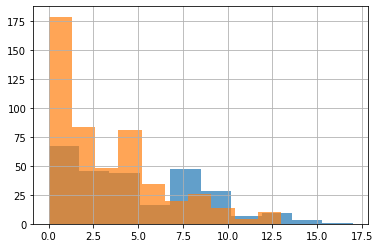

Glucose


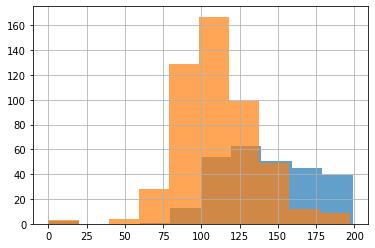

BloodPressure


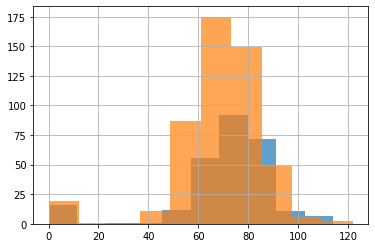

SkinThickness


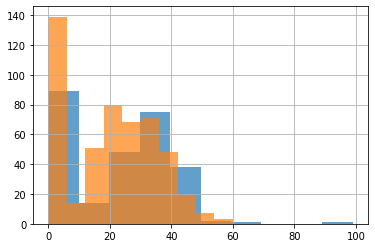

Insulin


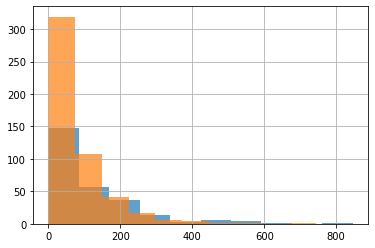

BMI


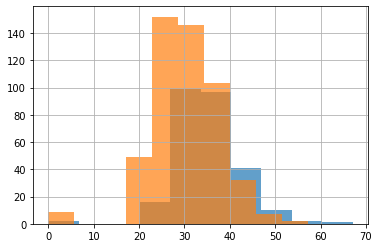

DiabetesPedigreeFunction


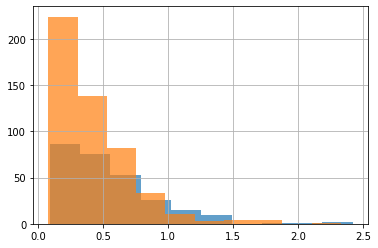

Age


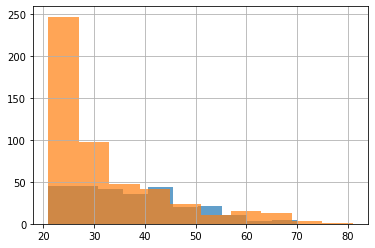

Outcome


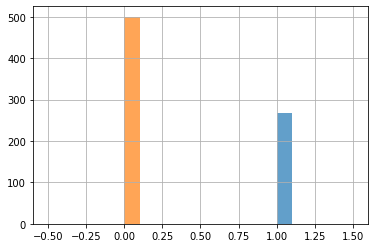

In [8]:
clasificador_grafico(df)

### Podemos ver tanto gráficamente como en datos los diferentes comportamientos de las variables.

# ahora dividimos la data en IS y OOS.

In [9]:
longitud=len(df)
longitud

768

In [10]:
# Nos quedamos con un 75% de la data en el IS y un 25% en el OOS
iis=round(longitud*.75,0)
oos=longitud-iis
df_iis=df.loc[:iis]
df_oos=df.loc[iis:]
print('numero de datos en iis '+str(len(df_iis)))
print('numero de datos en oos '+str(len(df_oos)))

numero de datos en iis 577
numero de datos en oos 192


Pregnancies


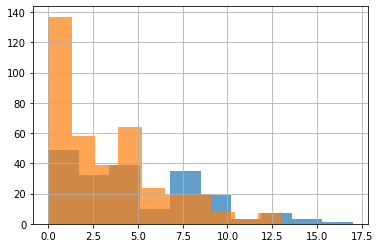

Glucose


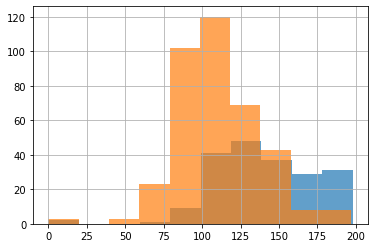

BloodPressure


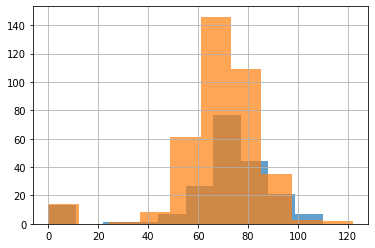

SkinThickness


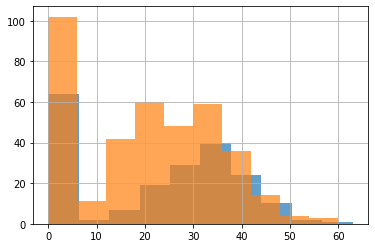

Insulin


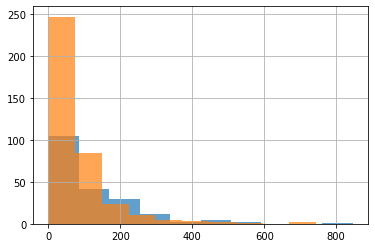

BMI


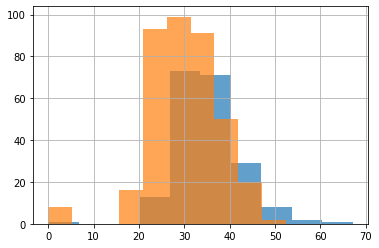

DiabetesPedigreeFunction


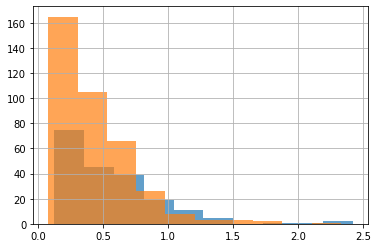

Age


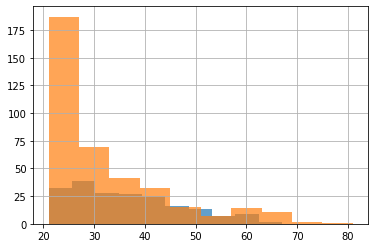

Outcome


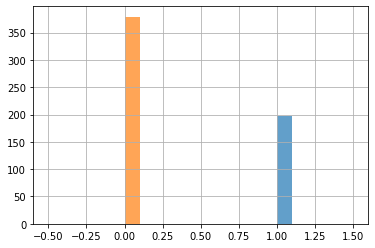

In [11]:
clasificador_grafico(df_iis)

# Podemos crear ahora nuestra primera regla. observamos que los datos de glucosa mayor de 165 son muy positivos, establecemos la regla


In [12]:
df_iis2= df_iis[df_iis.Glucose>165]
print(df_iis2.count()[0])

58


## Nos quedamos con 58 datos, que son el 10% de los datos y podemos ver los resultados

Pregnancies


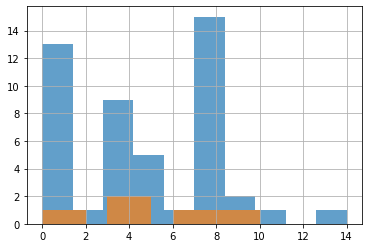

Glucose


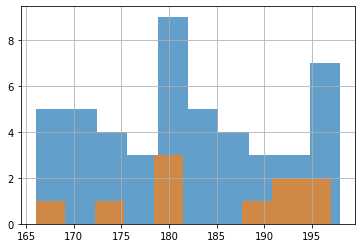

BloodPressure


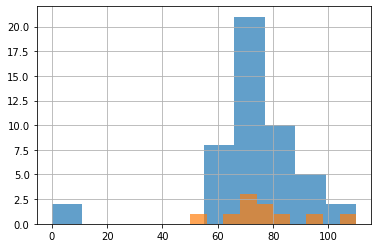

SkinThickness


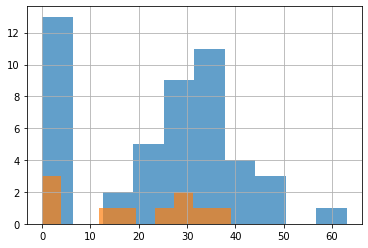

Insulin


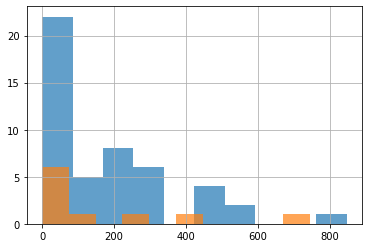

BMI


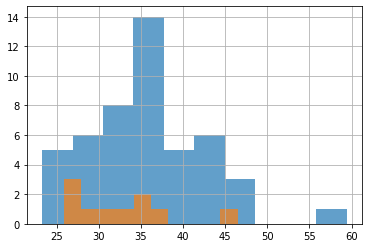

DiabetesPedigreeFunction


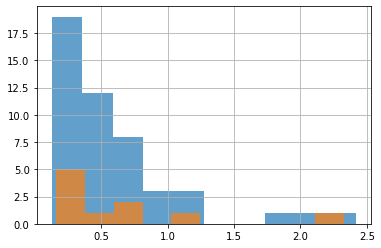

Age


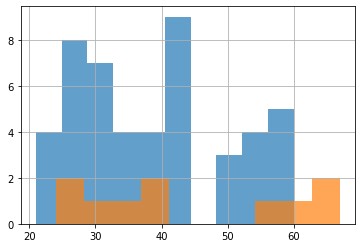

Outcome


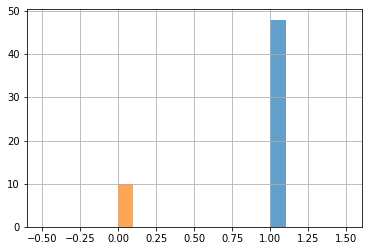

In [13]:
clasificador_grafico(df_iis2)

Podriamos mejorar nuestra prevision agregando la regla AGE<60, pero no vamos a complicar el modelo, nuestra accuracy sería del 80% aproximadamente


Ahora veremos como clasicamos la otra parte del iis

In [14]:
df_iis3= df_iis[df_iis.Glucose<165]
print(df_iis3.count()[0])

516


Pregnancies


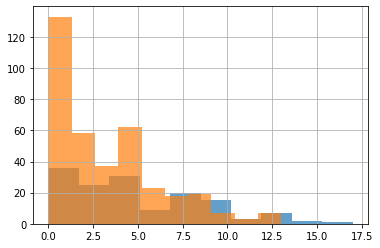

Glucose


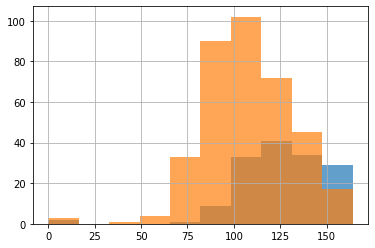

BloodPressure


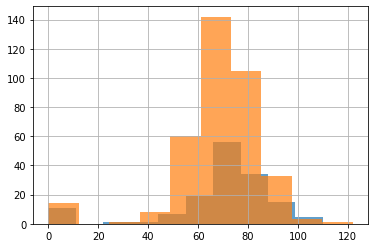

SkinThickness


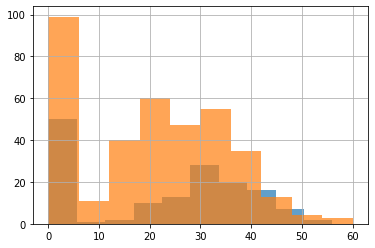

Insulin


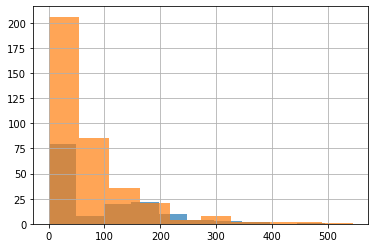

BMI


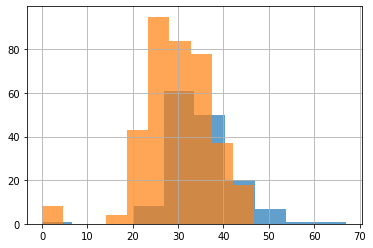

DiabetesPedigreeFunction


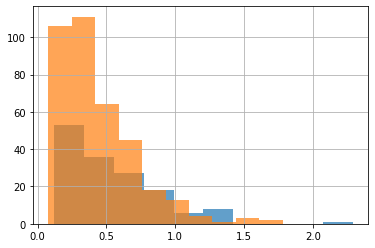

Age


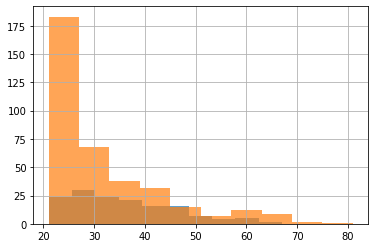

Outcome


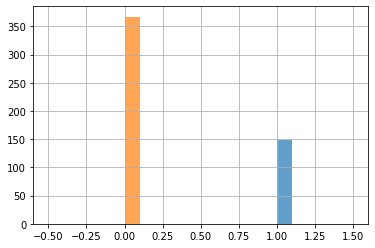

In [15]:
clasificador_grafico(df_iis3)

# Podemos añadir que la glucosa sea menor de 135

In [16]:
df_iis4= df_iis3[df_iis3.Glucose<135]
print(df_iis4.count()[0])

403


tenemos 403 datos 

Pregnancies


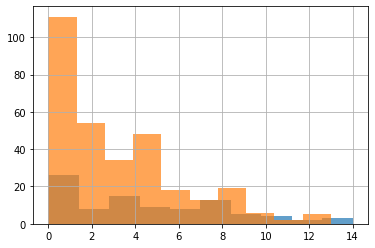

Glucose


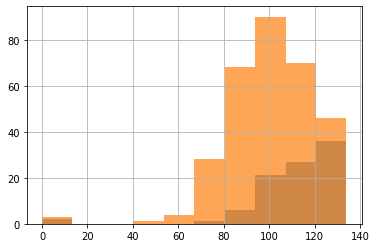

BloodPressure


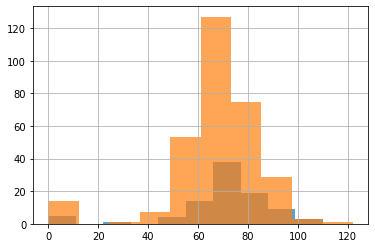

SkinThickness


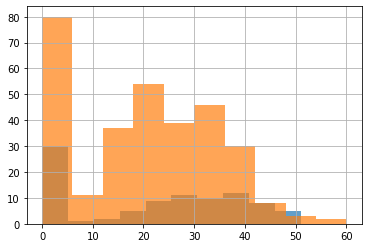

Insulin


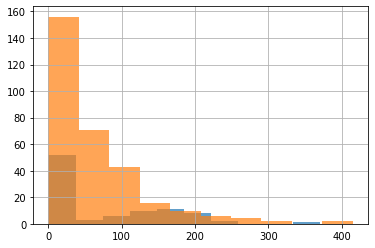

BMI


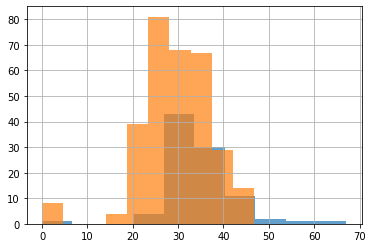

DiabetesPedigreeFunction


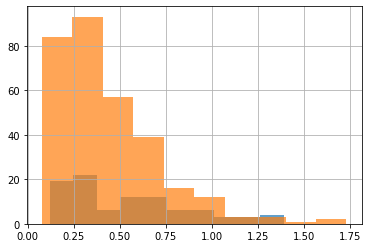

Age


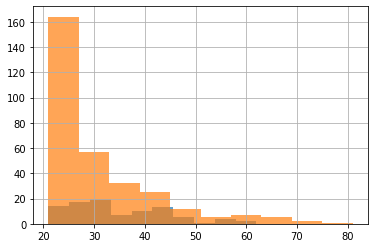

Outcome


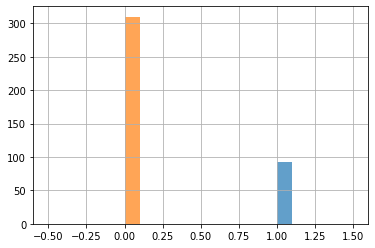

In [17]:
clasificador_grafico(df_iis4)

Podemos decir que hay otra regla que BMI < 45

In [18]:
df_iis4= df_iis3[(df_iis3.Glucose<135)&(df_iis3.BMI<45)]
print(df_iis4.count()[0])

388


Pregnancies


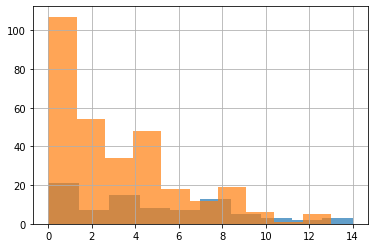

Glucose


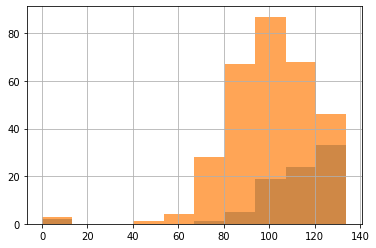

BloodPressure


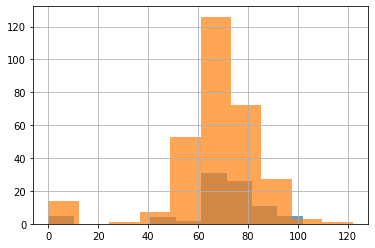

SkinThickness


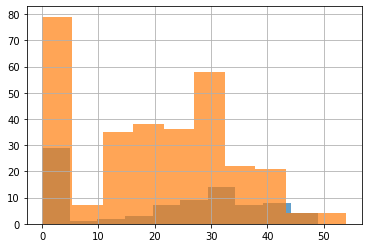

Insulin


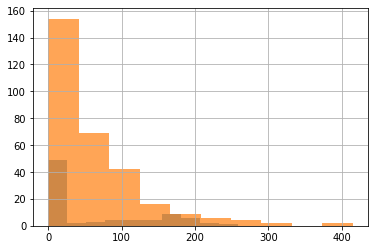

BMI


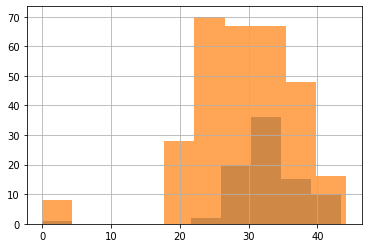

DiabetesPedigreeFunction


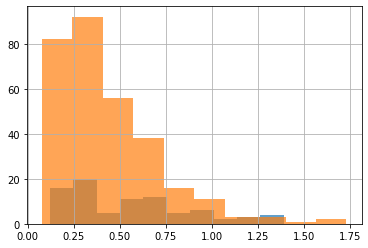

Age


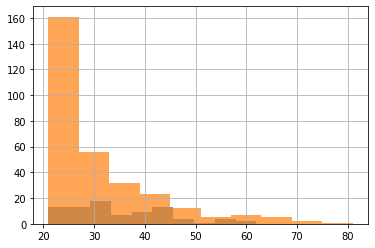

Outcome


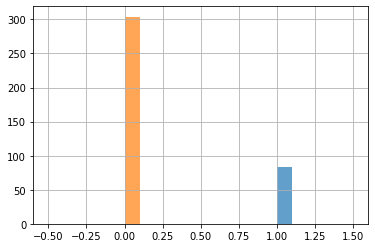

In [19]:
clasificador_grafico(df_iis4)

obtenemos mas de un 75% de Accuracy

Podríamos llegar mas aýa en nuestras decisiones pero prefiero quedarme así, para no forzar el sobreentrnmiento.

Creamos la regla de clasificación creada de la siguiente manera

In [20]:
df_iis['clase']= np.where(df_iis.Glucose>165,1,np.where((df_iis.Glucose<135)&(df_iis.BMI<45),0,-1))

<ipython-input-20-bba932f6e577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iis['clase']= np.where(df_iis.Glucose>165,1,np.where((df_iis.Glucose<135)&(df_iis.BMI<45),0,-1))


In [21]:
df_iis[df_iis.Outcome==df_iis.clase].count()[0]/len(df_iis)

0.610051993067591

In [22]:
df_iis[df_iis.Outcome!=df_iis.clase].count()[0]/len(df_iis)

0.389948006932409

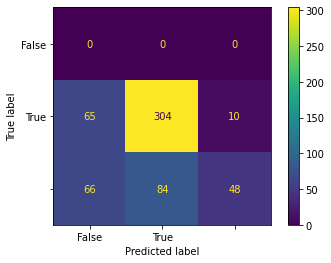

In [23]:
confusion(df_iis.Outcome,df_iis.clase)

In [24]:
df_iis5=df_iis[df_iis.clase==-1]

Pregnancies


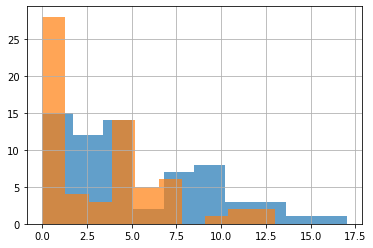

Glucose


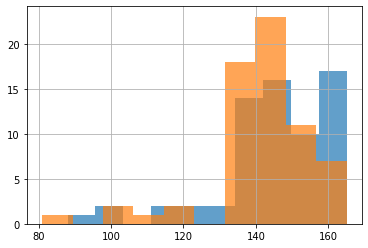

BloodPressure


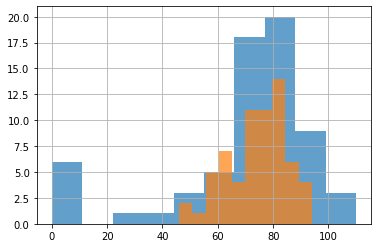

SkinThickness


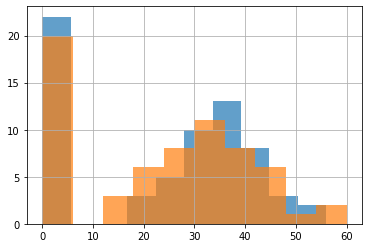

Insulin


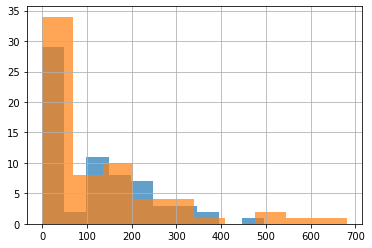

BMI


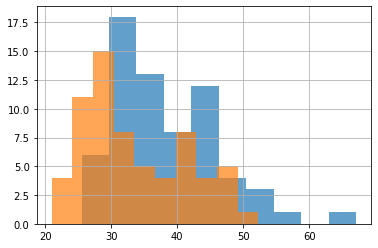

DiabetesPedigreeFunction


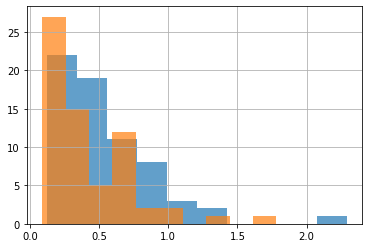

Age


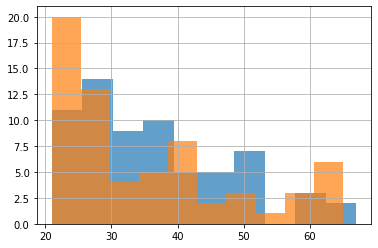

Outcome


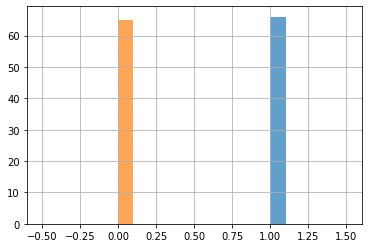

clase


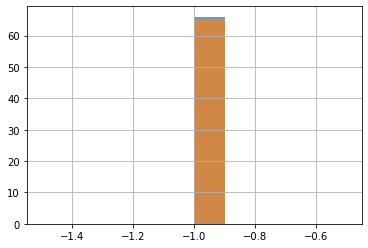

In [25]:
clasificador_grafico(df_iis5)

In [26]:
df_iis['clase']= np.where(df_iis.Glucose>165,1,np.where((df_iis.Glucose<135)&(df_iis.BMI<45),0,np.where(df_iis.BMI<30,0,1)))

<ipython-input-26-288aa956f7d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iis['clase']= np.where(df_iis.Glucose>165,1,np.where((df_iis.Glucose<135)&(df_iis.BMI<45),0,np.where(df_iis.BMI<30,0,1)))


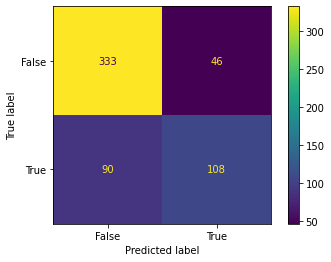

In [27]:
confusion(df_iis.Outcome,df_iis.clase)

In [28]:
 Accuracy = metrics.accuracy_score(df_iis.Outcome, df_iis.clase) 

In [29]:
Accuracy

0.7642980935875217

In [30]:
Precision = metrics.precision_score(df_iis.Outcome, df_iis.clase) 
Precision

0.7012987012987013

In [31]:
 Sensitivy = metrics.recall_score(df_iis.Outcome, df_iis.clase) 
 Sensitivy

0.5454545454545454

# Veamos ahora que sucede con la  parte OOS

In [32]:
df_oos['clase']= np.where(df_oos.Glucose>165,1,np.where((df_oos.Glucose<135)&(df_oos.BMI<45),0,np.where(df_oos.BMI<30,0,1)))

<ipython-input-32-253d57f0e287>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oos['clase']= np.where(df_oos.Glucose>165,1,np.where((df_oos.Glucose<135)&(df_oos.BMI<45),0,np.where(df_oos.BMI<30,0,1)))


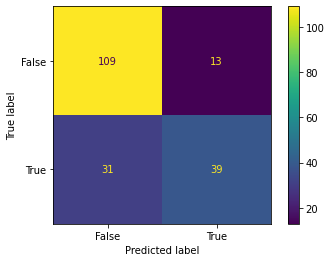

In [33]:
confusion(df_oos.Outcome,df_oos.clase)

In [34]:
 Accuracy = metrics.accuracy_score(df_oos.Outcome, df_oos.clase) 
 Accuracy

0.7708333333333334

# Vemos que tiene un resultado muy similar

# Ahora vamos a implementar el código en ripper

In [78]:
X_train=df_iis[df_iis.columns[:-2]]
Y_train=df_iis[df_iis.columns[-2:-1]]
X_test=df_oos[df_oos.columns[:-2]]
Y_test=df_oos[df_oos.columns[-2:-1]]


In [79]:
Y_train=np.where(Y_train.Outcome==1,True,False)
Y_test=np.where(Y_test.Outcome==1,True,False)


In [101]:
ripper_clf = lw.RIPPER(random_state=332,max_rules=4)
ripper_clf.fit(X_train, Y_train, )
print("RULESET:\n")
print(ripper_clf.out_model())


RULESET:

[[Glucose=>165.4 ^ Age=37.0-42.0] V
[Glucose=>165.4] V
[Glucose=146.0-165.4] V
[DiabetesPedigreeFunction=>0.88 ^ Insulin=145.0-215.0]]
None


In [91]:
predict_train = ripper_clf.predict(X_train)
predict_test = ripper_clf.predict(X_test)

In [92]:
#MOSTRAMOS ACCURACY EN TRAIN, TEST Y OUT OF SAMPLE
print("\nTrain accuracy: ", ripper_clf.score(X_train, Y_train))
print("\nTest accuracy: ",  ripper_clf.score(X_train,   Y_test ))



Train accuracy:  0.7383015597920277

Test accuracy:  0.6041666666666666


In [93]:
ripper_clf.predict_proba(X_test)[-15:]

array([[0.17241379, 0.82758621],
       [0.09090909, 0.90909091],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.17241379, 0.82758621],
       [0.72440945, 0.27559055],
       [0.17241379, 0.82758621],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055],
       [0.72440945, 0.27559055]])

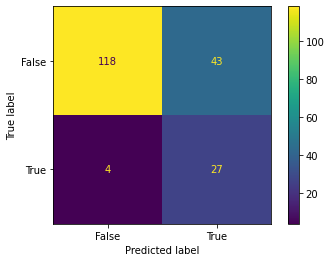

In [94]:
confusion(predict_test,Y_test)